In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from models import *
from utils import *
from training import *
from testing import *
from callbacks import *

In [3]:
model_name = {'denoising': 'Denoising', 'vanilla': 'Vanilla', 'replicated20':'Replicated'}

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_vanilla


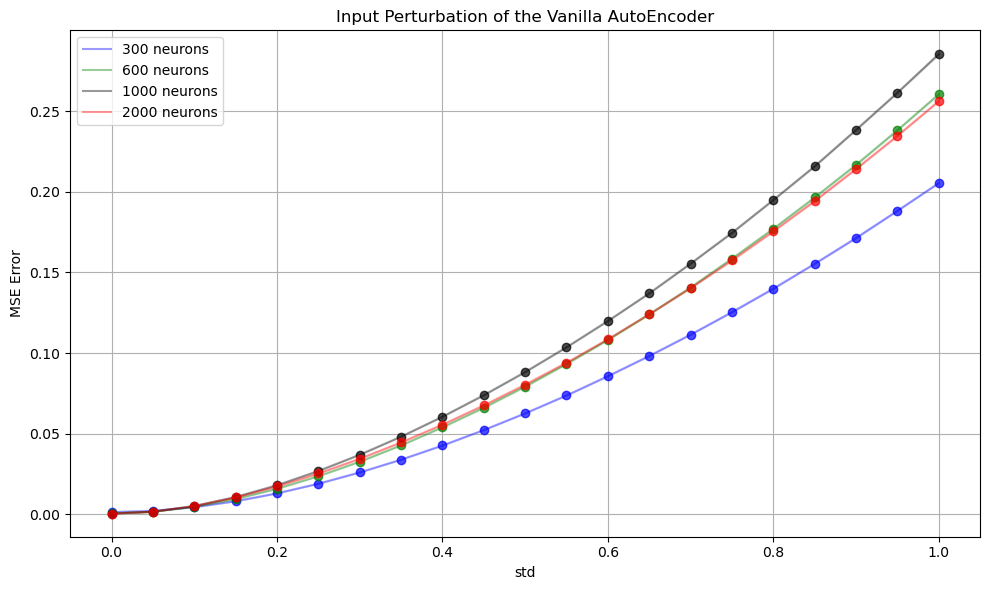

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_replicated20


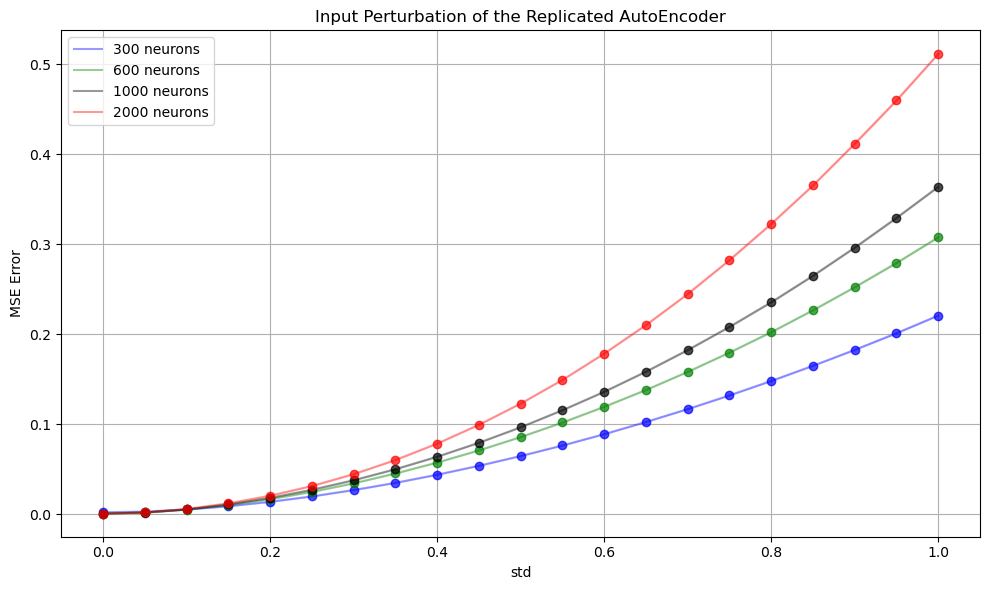

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_denoising


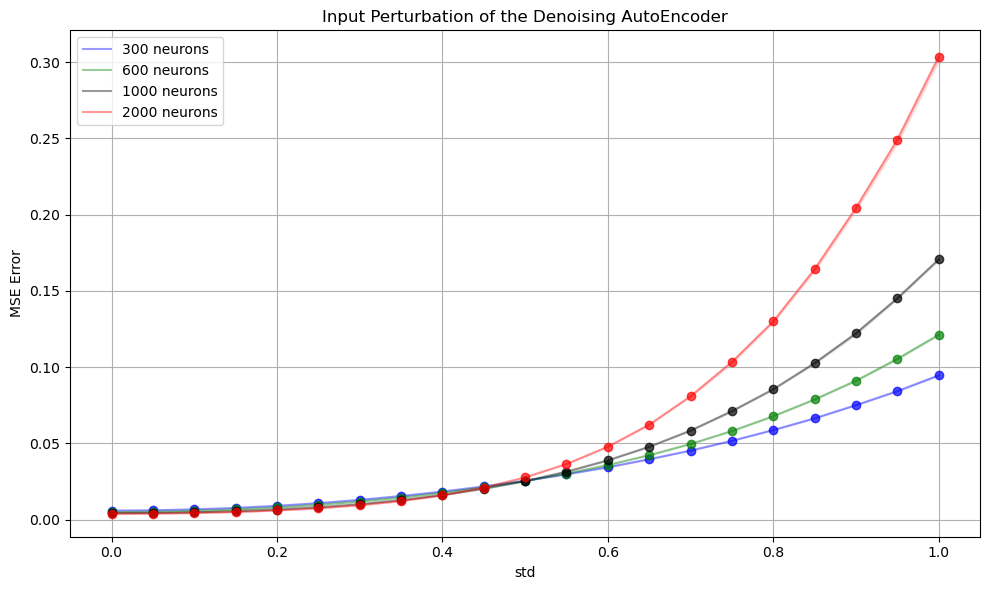

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_vanilla


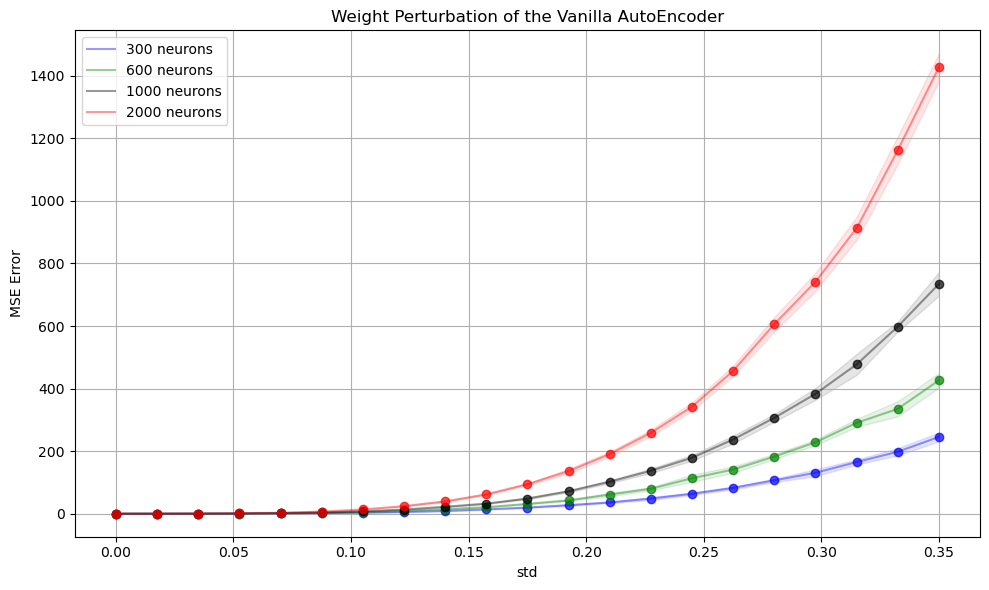

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_replicated20


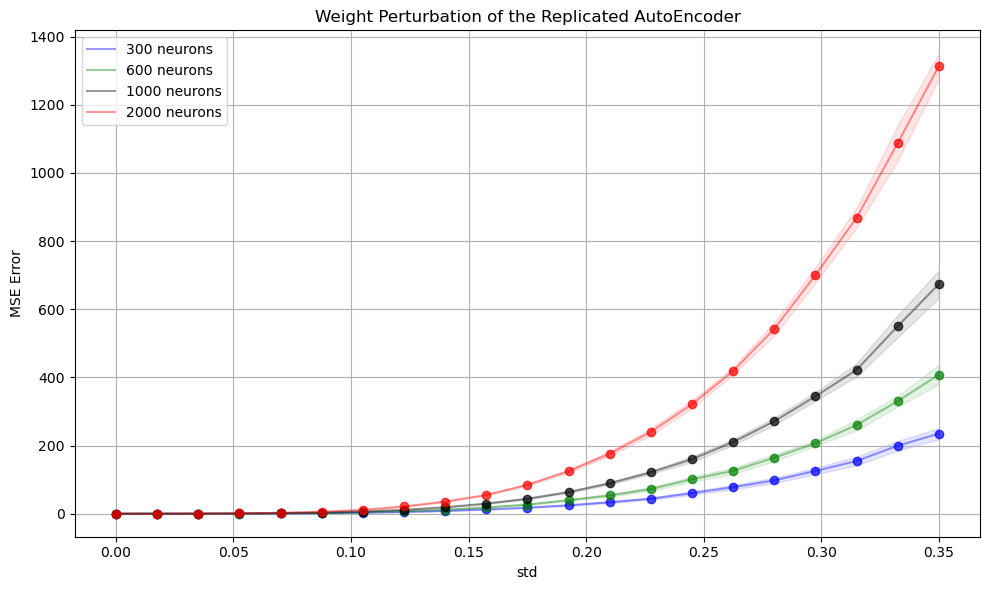

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_denoising


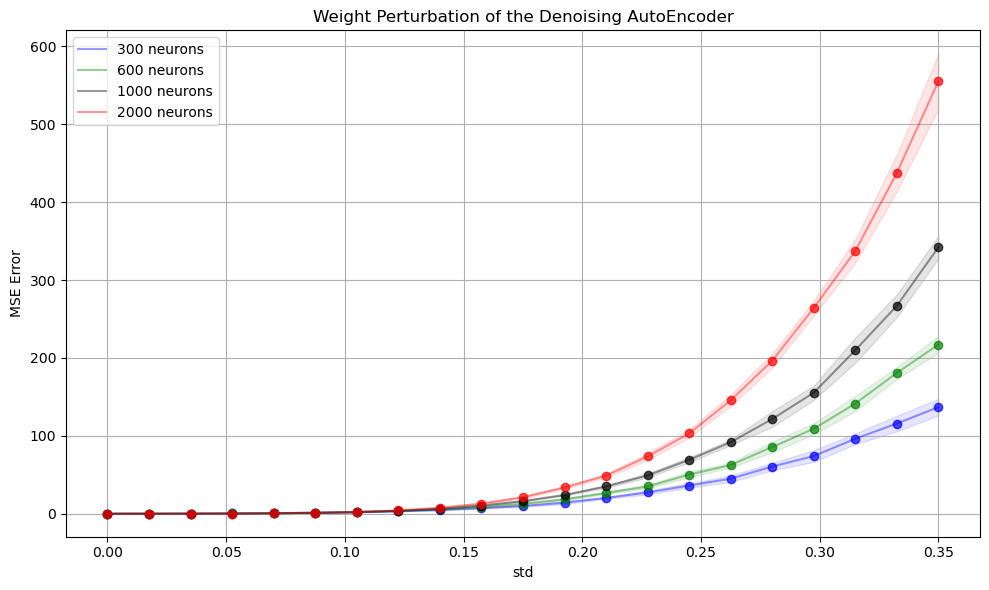

In [7]:
# plot models' results individually

# Set the styling theme
plt.style.use('default')

for perturb in ['input', 'weight']:
    for model in ['vanilla', 'replicated20', 'denoising']:
        # Set the plot size
        fig = plt.figure(figsize=(10, 6))
        for color, neurons in zip(['blue', 'green', 'black', 'red'], [300, 600, 1000, 2000]):

            path = f'to_plot/{perturb}_{model}_{neurons}neurons_5000samples'
            errors = pd.read_csv(path, index_col=0)

            # get x_axis
            x_axis = list(map(float, errors.columns))
            # get means and stds
            means = errors.iloc[0, :]
            stds = errors.iloc[1, :]
            # plot means
            plt.plot(x_axis, means, 'o', color=color, alpha=0.7)
            plt.plot(x_axis, means, '-', label=f'{neurons} neurons', color=color, alpha=0.4)

            # plot stds
            plt.fill_between(x_axis, means - stds, means + stds, alpha=0.1, color=color)


        plt.xlabel('std')
        plt.ylabel('MSE Error')

        plt.title(f'{perturb.capitalize()} Perturbation of the {model_name[model]} AutoEncoder')
        plt.grid()
        plt.legend()
        save_fig(f'{cwd}/images/results/{perturb.capitalize()}_{model}')
        plt.show()

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_300


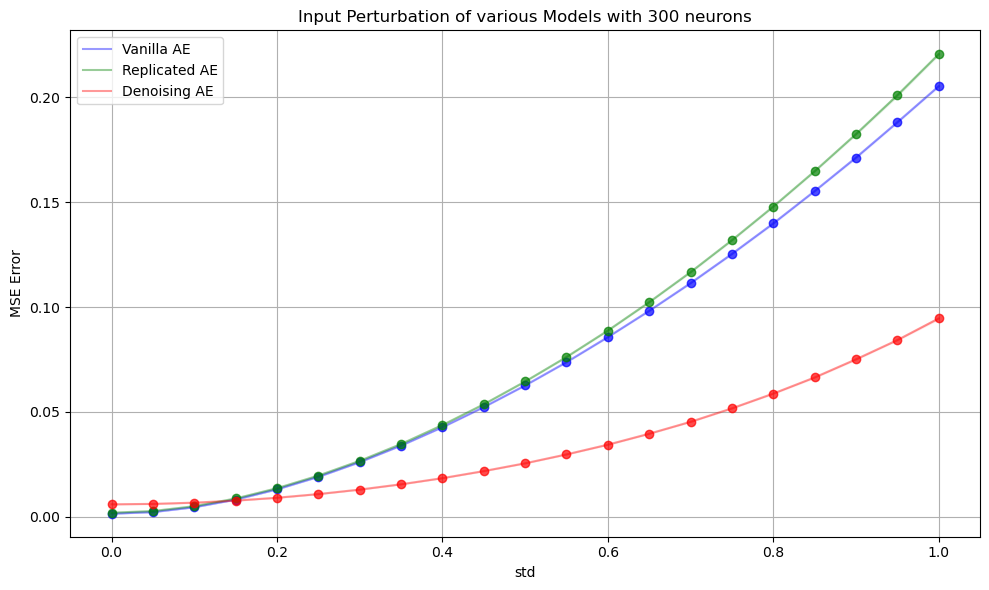

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_300


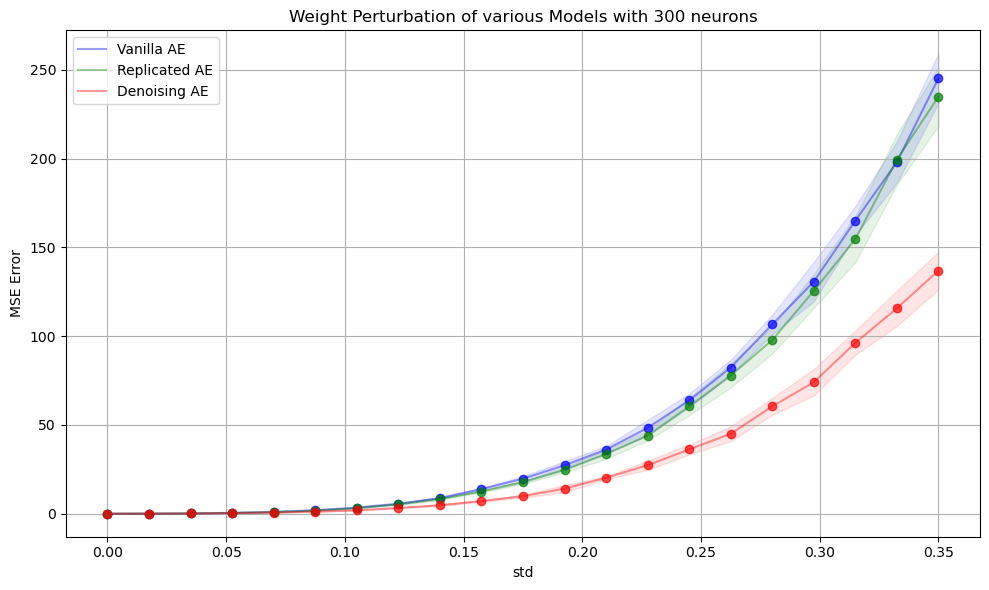

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_600


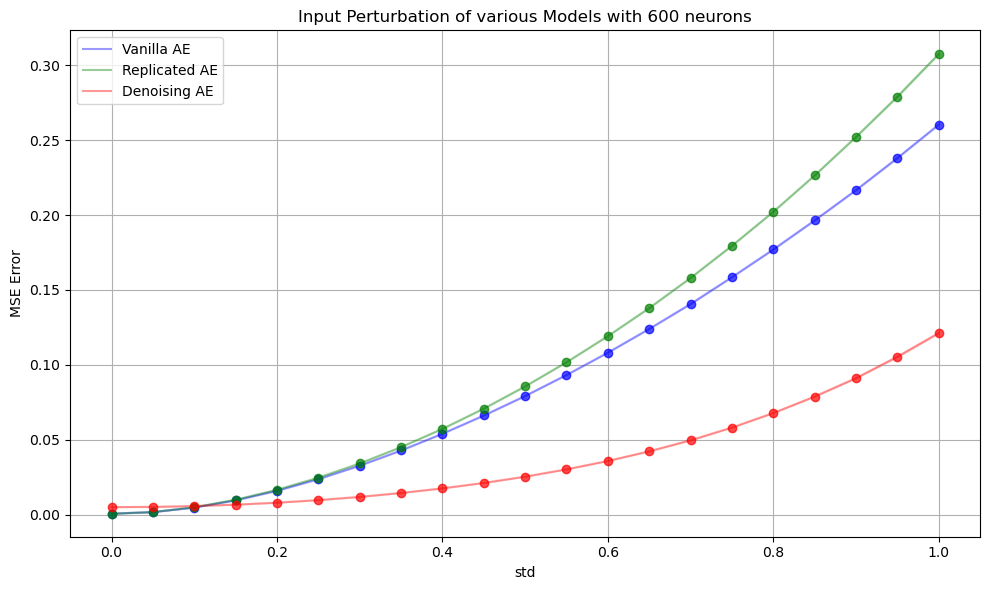

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_600


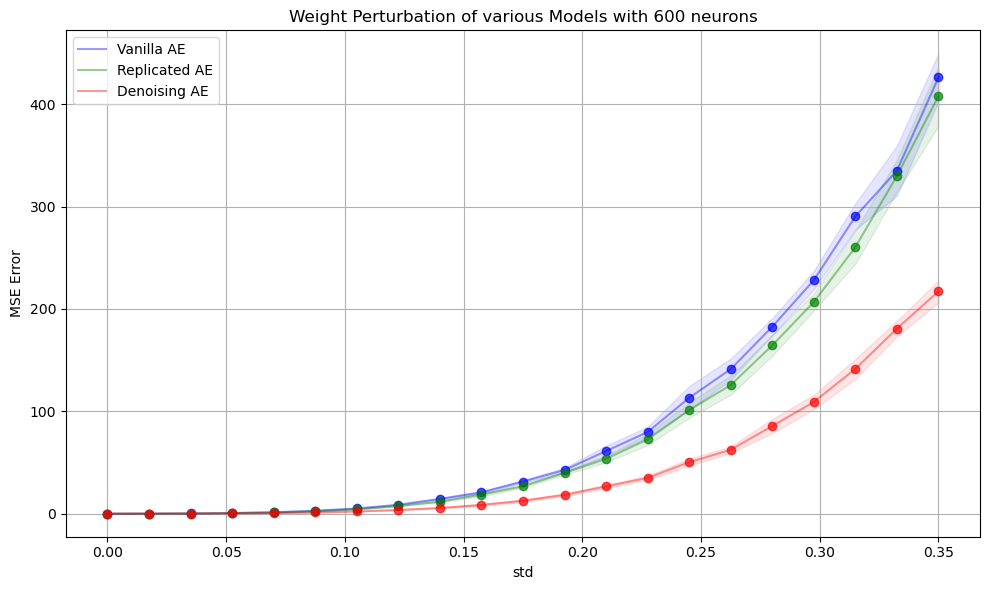

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_1000


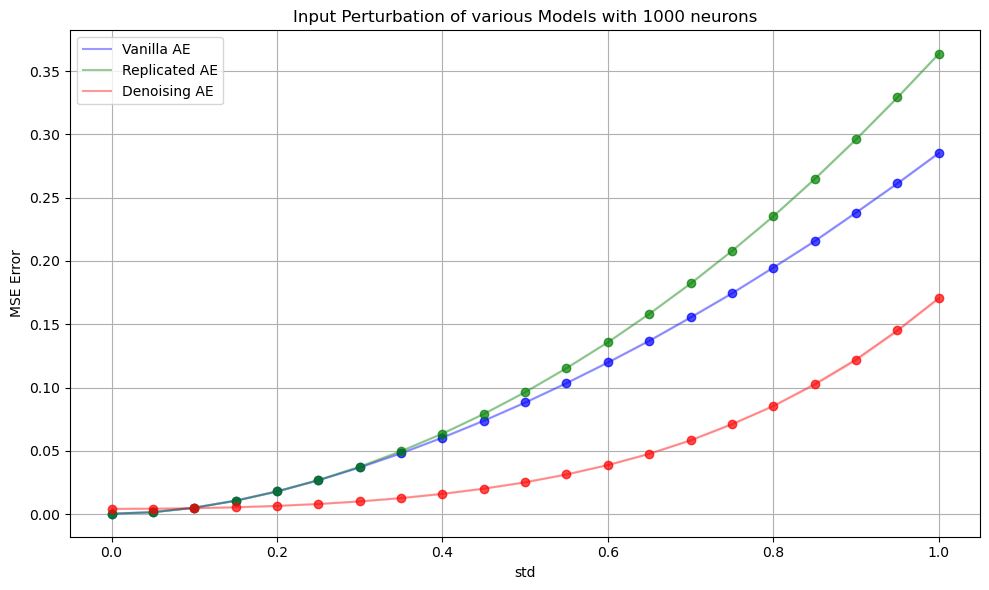

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_1000


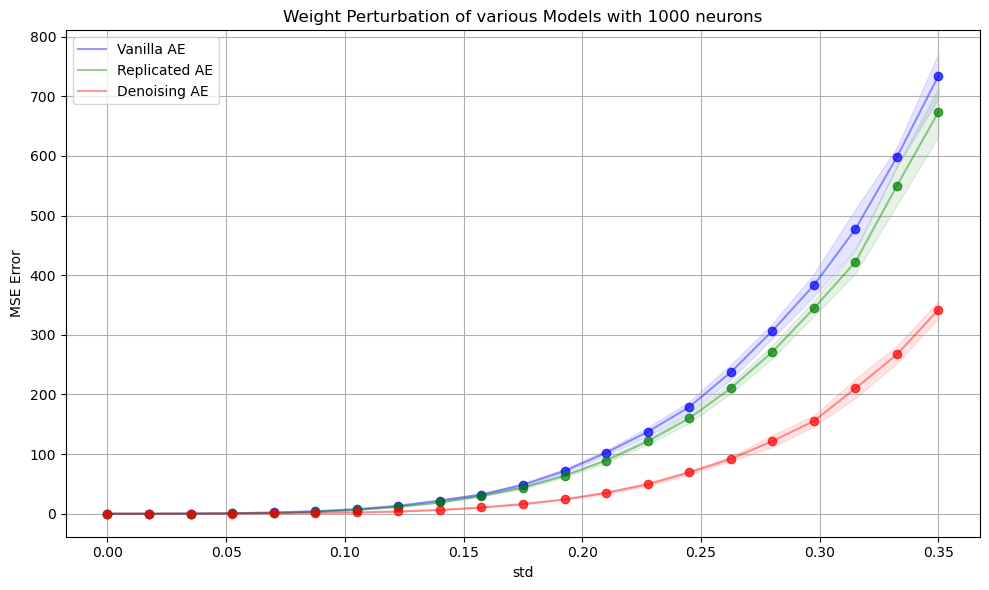

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Input_2000


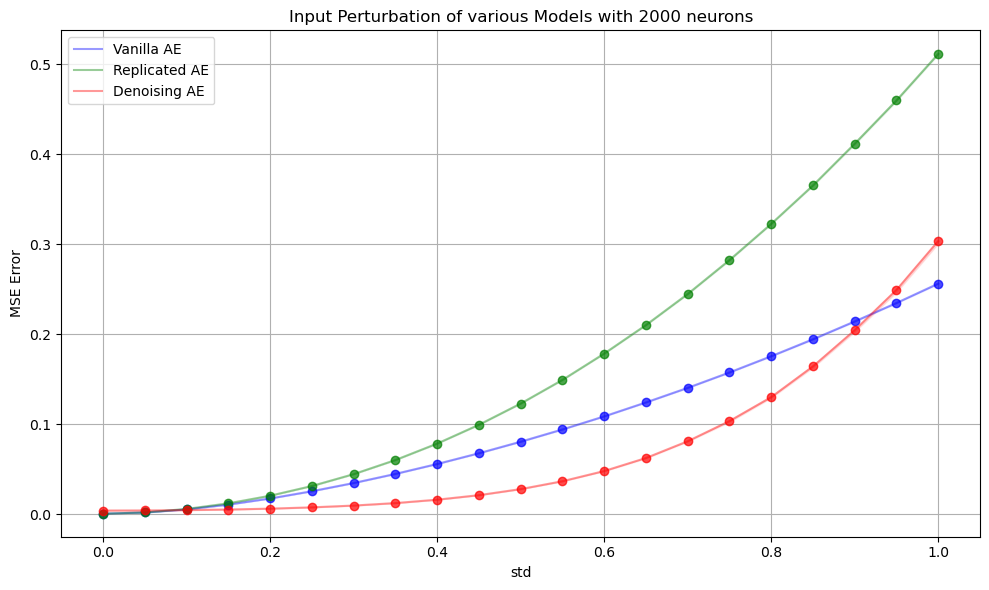

Saving figure /Users/klejdisevdari/PycharmProjects/bocconiresearch2/Replicated-SGD---Autoencoder/images/results/Weight_2000


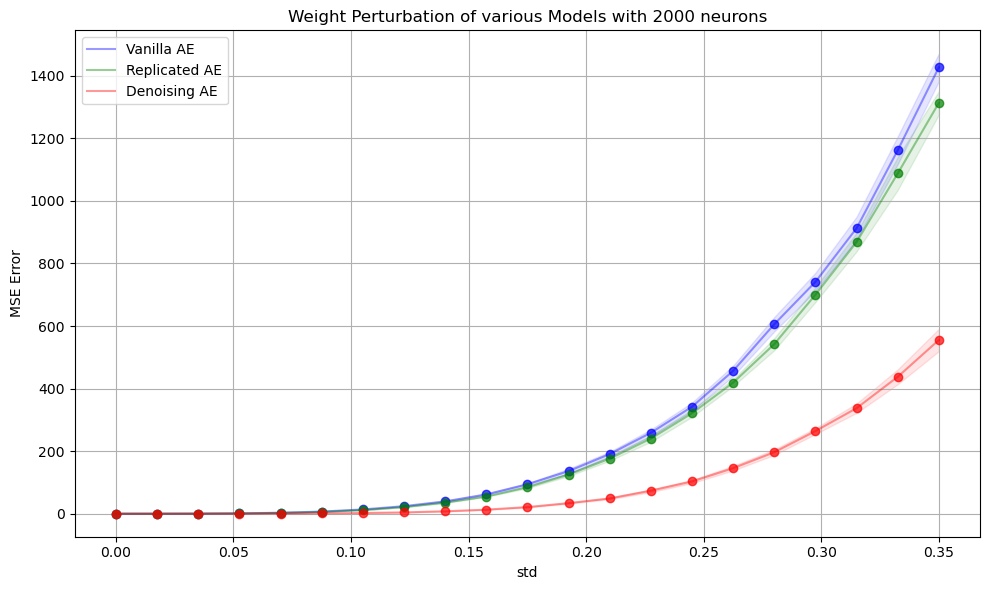

In [53]:
# Compare across models

for neurons in [300, 600, 1000, 2000]:
    for perturb in ['input', 'weight']:
        fig = plt.figure(figsize=(10, 6))
        for color, model in zip(['blue', 'green', 'red'], ['vanilla', 'replicated20', 'denoising']):
            path = f'to_plot/{perturb}_{model}_{neurons}neurons_5000samples'
            errors = pd.read_csv(path, index_col=0)

            # get x_axis
            x_axis = list(map(float, errors.columns))
            # get means and stds
            means = errors.iloc[0, :]
            stds = errors.iloc[1, :]
            # plot means
            plt.plot(x_axis, means, 'o', color=color, alpha=0.7)
            plt.plot(x_axis, means, '-', label=f'{model_name[model]} AE', color=color, alpha=0.4)

            # plot stds
            plt.fill_between(x_axis, means - stds, means + stds, alpha=0.1, color=color)

        plt.xlabel('std')
        plt.ylabel('MSE Error')
        plt.title(f'{perturb.capitalize()} Perturbation of various Models with {neurons} neurons')
        plt.grid()
        plt.legend()
        save_fig(f'{cwd}/images/results/{perturb.capitalize()}_{neurons}')
        plt.show()

# Weight Distributions

In [4]:
from core import *
import seaborn as sns

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# normalize pixels to be in the range [0, 1] and recast them as floats
x_train = x_train.reshape(60000, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(10000, 784).astype(np.float32) / 255.0

(470400,)
1.2060894


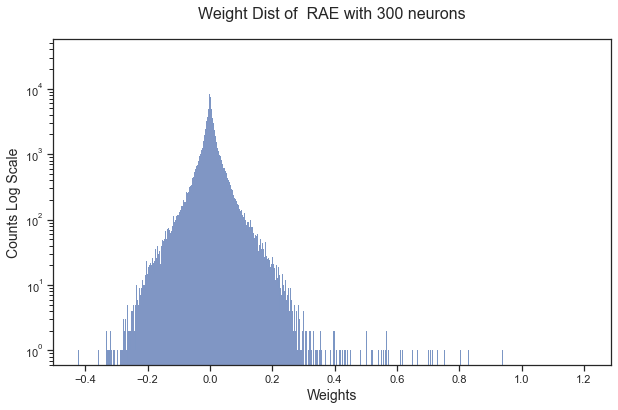

(940800,)
1.1820586


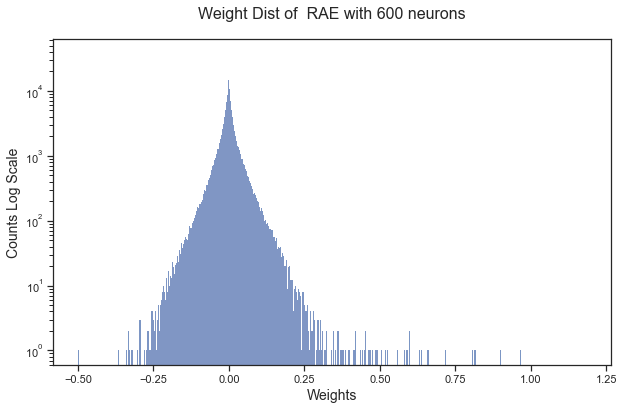

(1568000,)
1.0328027


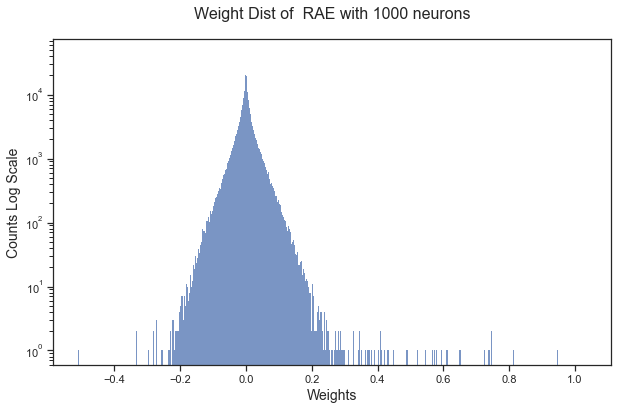

(3136000,)
1.0985771


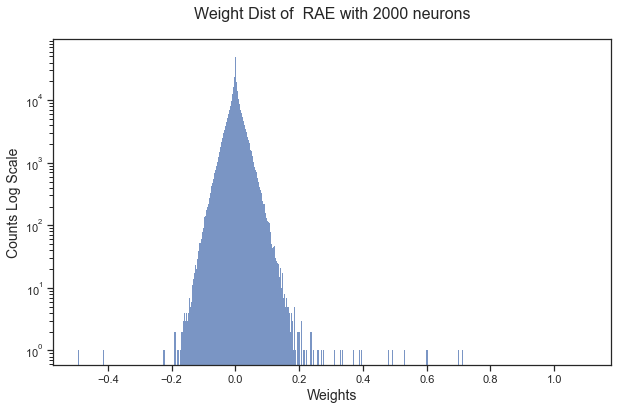

In [37]:
sns.set_theme(style="ticks")


def weight_dist(weights, title):
    fig = plt.figure(figsize=(10, 6))
    flat_weights = list(map(np.ndarray.flatten, weights[0::2]))
    # you can get the weights by layer using the list above
    # for now we plot all the weights
    all_weights = np.concatenate(flat_weights)
    print(all_weights.shape)
    print(all_weights.max())
    sns.histplot(data=all_weights, log_scale=[False, True])
    plt.xlabel('Weights', fontsize=14)
    plt.ylabel('Counts Log Scale', fontsize=14)
    plt.title(title, fontsize=16, pad=20)
    plt.show()


for neurons in [300, 600, 1000, 2000]:
    path = f'/Users/klejdisevdari/PycharmProjects/bocconiresearch2/01_07/replicated20_{neurons}neurons_5000samples'

    config = {
        'neurons_encoder': [neurons],
        'neurons_decoder': [784],
        'n_replicas': 20
    }

    model = load_model(path, ReplicatedAutoEncoder , config, x_train[:2])
    model = extract_baricenter(model)
    title = f'Weight Dist of  RAE with {neurons} neurons'
    weight_dist(model.get_weights(), title)

# Elastic Transformations

In [56]:
lst = [] # to store transformations
num = 5000 # number of transformations
for i in range(num):
    transform = elastic_transform(x_train[i].reshape(28, 28, 1), 8, 2)
    transform = transform.reshape(-1, )
    lst.append(transform)

elastic_data = np.array(lst)
elastic_data.shape

(5000, 784)

## Vanilla

In [111]:
losses_vanilla = []
model = None
for neurons in [600, 1000, 2000, 300]:
    path = f'/Users/klejdisevdari/PycharmProjects/bocconiresearch2/01_07/vanilla_{neurons}neurons_5000samples'

    config = {
        'neurons_encoder': [neurons],
        'neurons_decoder': [784]
    }

    model = load_model(path,  AutoEncoder, config, x_train[:2])
    model.compile(optimizer='adam', loss='mse')
    temp = model.evaluate(elastic_data, x_train[:num])
    losses_vanilla.append(temp)

157/157 [==============================] - 0s 679us/step - loss: 0.0240


In [112]:
print(losses_vanilla)

[0.02403951808810234, 0.024144083261489868, 0.02407628856599331, 0.023965084925293922]


In [113]:
sum(losses_vanilla)/4

0.02405624371021986

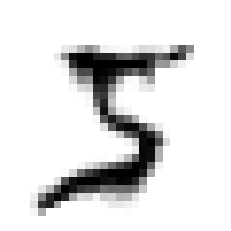

In [114]:
plt.imshow(elastic_data[0].reshape(28, 28), 'binary')
plt.axis('off')
plt.show()

(-0.5, 27.5, 27.5, -0.5)

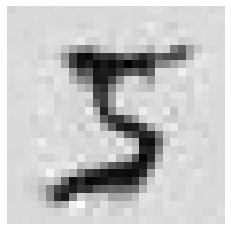

In [115]:
prediction = model.predict(elastic_data[0].reshape(1, -1))
prediction = prediction.reshape(28, 28)
plt.imshow(prediction, 'binary')
plt.axis('off')

## Denoising

In [117]:
losses_dae = []
for neurons in [600, 1000, 2000, 300]:
    path = f'/Users/klejdisevdari/PycharmProjects/bocconiresearch2/01_07/denoising_{neurons}neurons_5000samples'

    config = {
        'neurons_encoder': [neurons],
        'neurons_decoder': [784]
    }

    model = load_model(path,  AutoEncoder, config, x_train[:2])
    model.compile(optimizer='adam', loss='mse')
    temp = model.evaluate(elastic_data, x_train[:num])
    losses_dae.append(temp)

157/157 [==============================] - 0s 1ms/step - loss: 0.0224


In [118]:
print(losses_dae)

[0.022288894280791283, 0.0222622137516737, 0.022133754566311836, 0.022388171404600143]


In [119]:
print(sum(losses_dae)/4)

0.02226825850084424


(-0.5, 27.5, 27.5, -0.5)

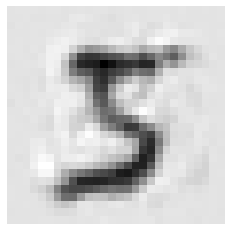

In [120]:
prediction = model.predict(elastic_data[0].reshape(1, -1))
prediction = prediction.reshape(28, 28)
plt.imshow(prediction, 'binary')
plt.axis('off')

## Replicated

In [121]:
losses_rae = []
for neurons in [600, 1000, 2000, 300]:
    path = f'/Users/klejdisevdari/PycharmProjects/bocconiresearch2/01_07/replicated20_{neurons}neurons_5000samples'

    config = {
        'neurons_encoder': [neurons],
        'neurons_decoder': [784],
        'n_replicas': 20
    }

    model = load_model(path, ReplicatedAutoEncoder , config, x_train[:2])
    model = extract_baricenter(model)
    model.compile(optimizer='adam', loss='mse')
    temp = model.evaluate(elastic_data, x_train[:num])
    losses_rae.append(temp)

157/157 [==============================] - 0s 682us/step - loss: 0.0242


In [122]:
print(losses_rae)

[0.024121815338730812, 0.024156207218766212, 0.024175498634576797, 0.024220779538154602]


In [123]:
print(sum(losses_rae)/4)

0.024168575182557106


(-0.5, 27.5, 27.5, -0.5)

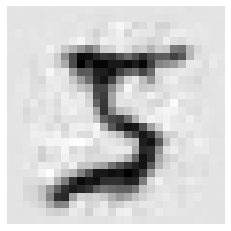

In [124]:
prediction = model.predict(elastic_data[0].reshape(1, -1))
prediction = prediction.reshape(28, 28)
plt.imshow(prediction, 'binary')
plt.axis('off')

# Get original image

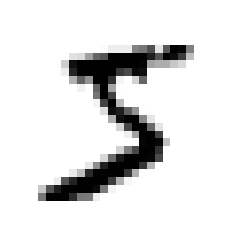

In [105]:
plt.imshow(x_train[0].reshape(28, 28), 'binary')
plt.axis('off')
plt.show()

# Performance across Replicas

In [7]:
x_small = x_train[:5000]

Started 5 replicas
Started 10 replicas
Started 20 replicas


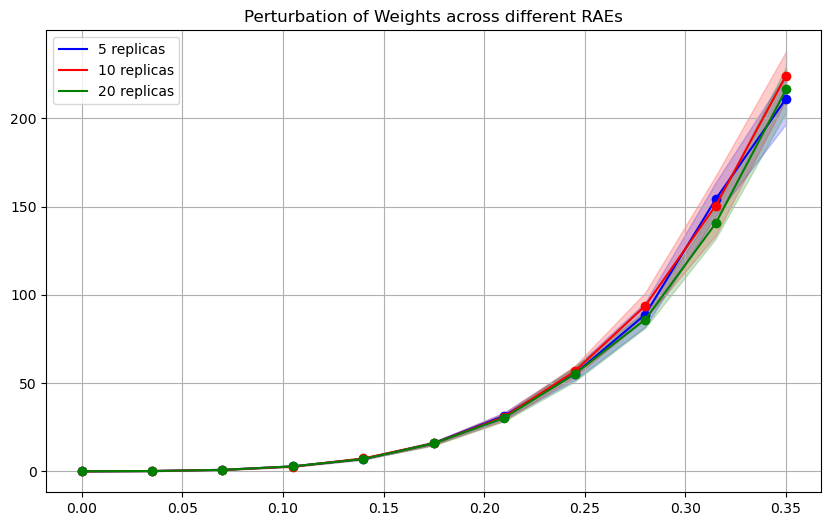

over


In [14]:
# big for loop
fig = plt.figure(figsize=(10, 6))
for color, replicas in zip(['blue', 'red', 'green'], [5, 10, 20]):
    print(f'Started {replicas} replicas')
    # instantiate a Replicated AutoEncoder with a single hidden layer and compile it
    rae = ReplicatedAutoEncoder([300], [784], n_replicas=replicas)
    rae.compile(optimizer='adam', loss='mse')

    # set up a checkpoint callback for training

    MODEL_PATH = "models/prova/replicated"

    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath=MODEL_PATH,
        monitor='loss',
        save_weights_only=True,
    )

    # set up a callback to schedule the regularization rate during training
    rate_callback = ExponentialRateCallback(2e-5, 0.1, verbose=0)
    rae.fit(x_small, x_small, epochs=100, callbacks=[checkpoint_callback, rate_callback], verbose=0)

    # use the checkpoint to load the weights of the trained model inside a newly initialized model

    config = rae.get_config()

    compile_config = {
        "optimizer": 'adam',
        "loss": 'mse',
    }

    loaded = load_model(MODEL_PATH, ReplicatedAutoEncoder , config, x_train[:2])
    loaded = extract_baricenter(loaded)
    loaded.compile(optimizer='adam', loss='mse')
    # now perturb weights and see how this affects the capacity of the model to reconstruct (non-noisy) images
    x_axis = np.linspace(0.0, 0.35, 11)
    df_weights = weight_robustness(x_small, loaded, np.linspace(0.0, 0.35, 11), n_iter=10)

    # plot the reconstruction error as a function of the degree of perturbation of the weights (stddev)

    # get means and stds
    means = df_weights.iloc[:, 0]
    stds = df_weights.iloc[:, 1]

    # plot means
    plt.plot(x_axis, means, 'o', color=color)
    plt.plot(x_axis, means, '-', color=color, label=f'{replicas} replicas')

    # plot stds
    plt.fill_between(x_axis, means - stds, means + stds,
                     color=color, alpha=0.2)
plt.title('Perturbation of Weights across different RAEs')
plt.legend()
plt.grid()
plt.show()


print('over')

In [15]:
print('test')

test
